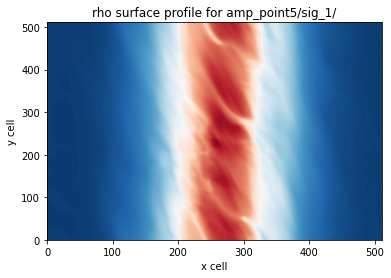

In [57]:
import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read
from celluloid import Camera
fig2 = plt.figure()
cam = Camera(fig2)
def surface_profile(file_name,data_name):
    #print('current file is :'+file_name)
    title=file_name[10:-20]
    title = data_name + ' surface profile for ' +title
    data = athena_read.athdf(file_name)
    #print(data)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    #print(volume,' volume')
    
    #constants
    omega0 = 1.0
    qshear = 1.5
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    data_arr = []
    #array of vshear possible values
    vsh = -qshear*omega0*data['x1v']
    vsh_3d = np.broadcast_to(vsh,(Nz,Ny,Nx))
    vel_y = data['vel2']-vsh_3d
    if data_name == '-BxBy':
        data_arr = -1*data['Bcc1']*data['Bcc2']
    elif data_name == 'rhovxvy':
        data_arr = data['vel1']*data['rho']*vel_y
 
    else:
        data_arr = data[data_name]
    if data_name == 'vel2':
        data_arr = data_arr-vsh_3d
    data_arr = np.sum(data_arr,axis=(0))
    radial_dim = data['x1f'][-1]-data['x1f'][0]
    div_vol = radial_dim*side_length
    #divide by number of cells in vertical slice
    data_arr = data_arr/(Nz)
    #print(np.shape(data_arr))

    #plotting section
    #plt.ioff()
    t=plt.pcolormesh(data_arr,norm=mpl.colors.Normalize(vmin=0,vmax=3.5),shading = 'gouraud',cmap = 'RdBu_r')
    #plt.colorbar(t,label="$\\rho/\\rho_0$")
    plt.xlabel('x cell')
    plt.ylabel('y cell')
    plt.title(title)

    return(t)

print(surface_profile('./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf','rho'))


passing step  0
passing step  25
passing step  50
passing step  75
passing step  100
Beginning animation
Run time is  478.40964794158936  seconds


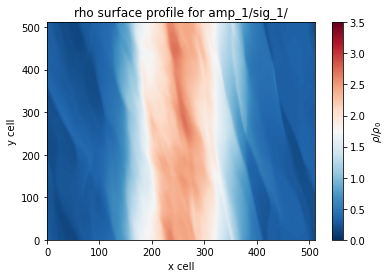

In [59]:
#MOVIE MAKING SECTION

#using celluloid
import matplotlib as mpl
import time
from matplotlib import pyplot as plt
from celluloid import Camera as cam
import ffmpeg
fig = plt.figure()
start = time.time()
outrange = range(0,101)

Cam = cam(fig)

file_path = './ad_prof/amp_1/sig_1'
for i in outrange:
        if z != []:
            z.remove()
        #plt.clf()
        if i<10:
            fname = file_path+'/HGB.out2.0000'+str(i)+'.athdf'
        elif 9<i<100:
            fname = file_path+'/HGB.out2.000'+str(i)+'.athdf'
        else:
            fname = file_path+'/HGB.out2.00'+str(i)+'.athdf'
        if i%25 == 0:
            print('passing step ',i)
        x=surface_profile(fname,'rho')
        z =plt.colorbar(label="$\\rho/\\rho_0$",location='right')
        Cam.snap()

print('Beginning animation')
anim = Cam.animate(blit=False,interval=300)
anim.save('am_1_sig_1_video.mp4',dpi=700)
print('Run time is ',(time.time()-start),' seconds' )

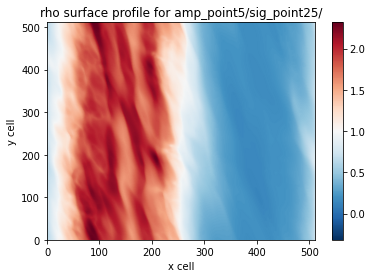

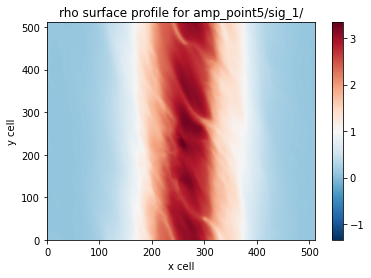

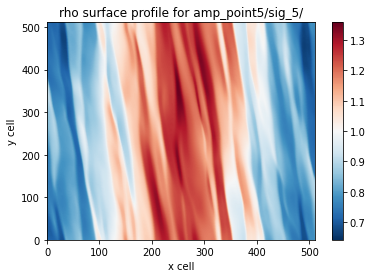

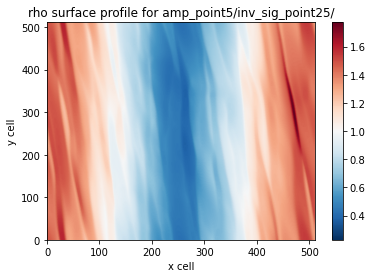

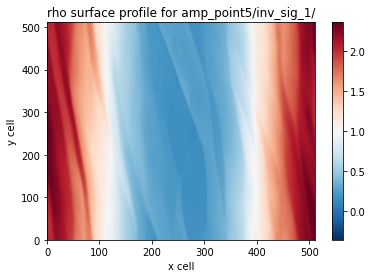

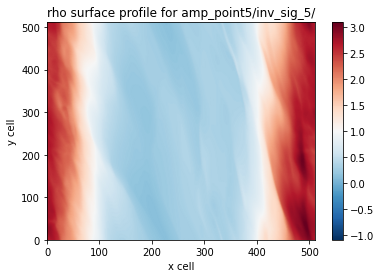

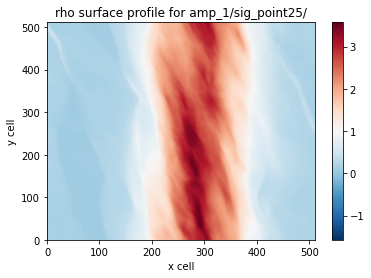

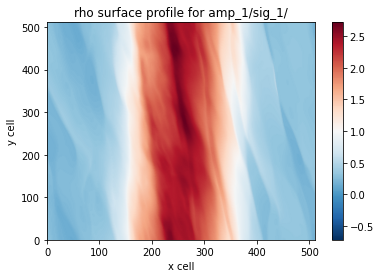

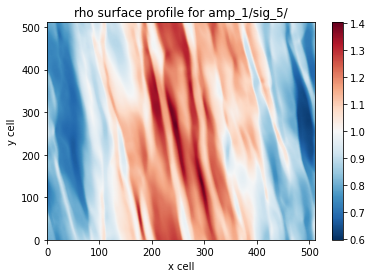

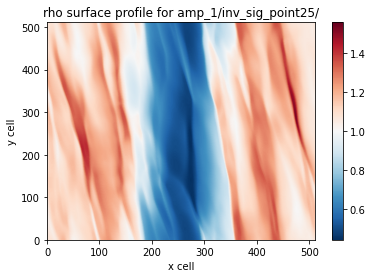

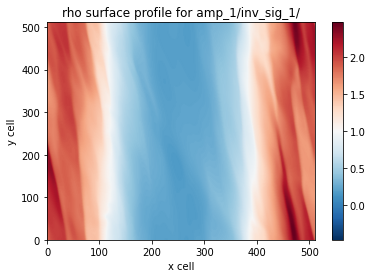

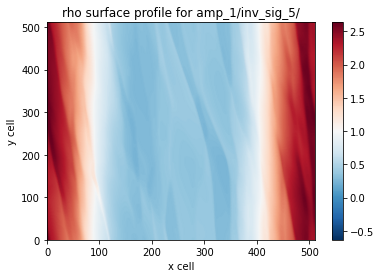

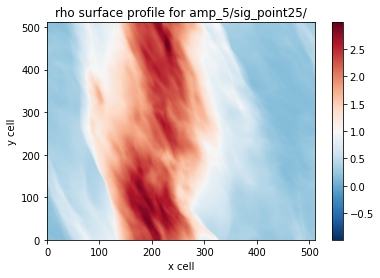

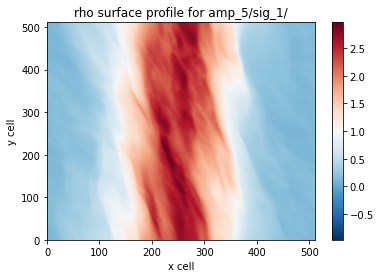

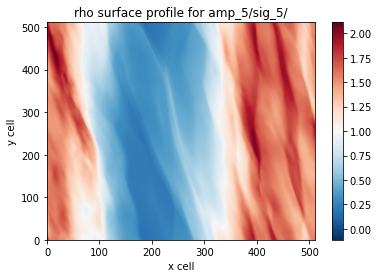

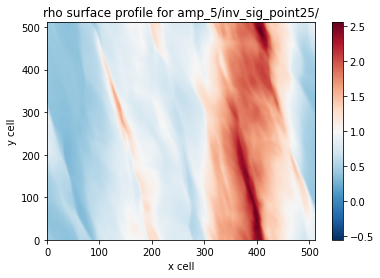

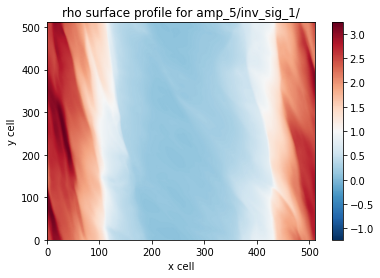

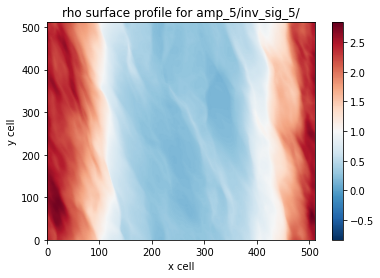

Run time is  37.22325396537781  seconds


In [11]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rho')
print('Run time is ',(time.time()-start),' seconds' )

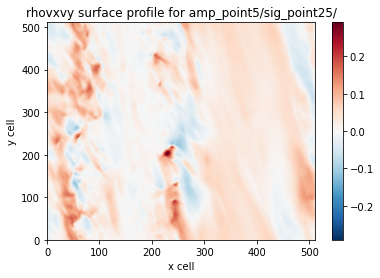

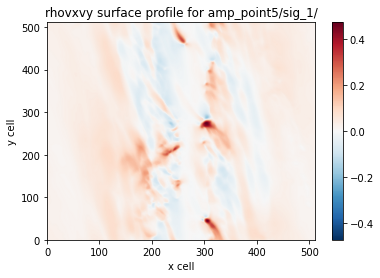

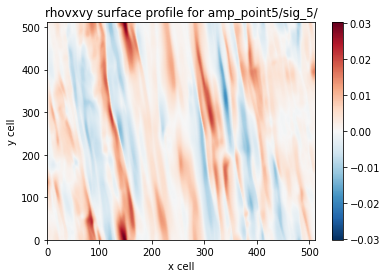

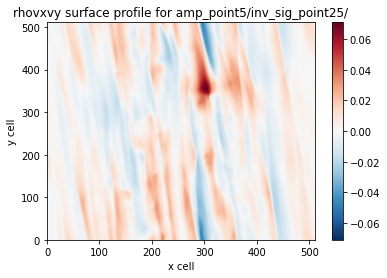

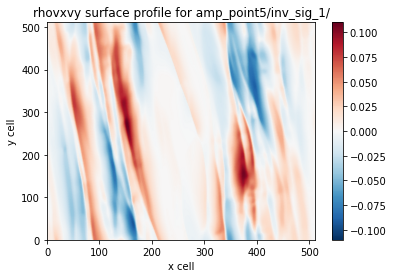

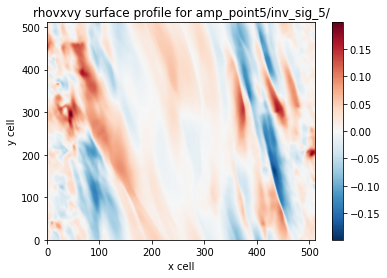

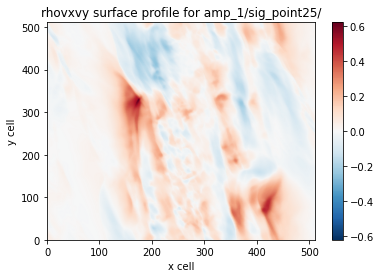

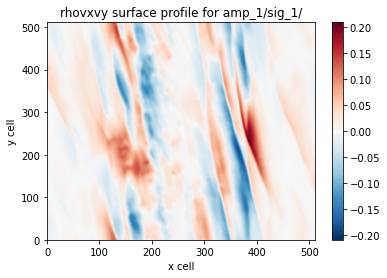

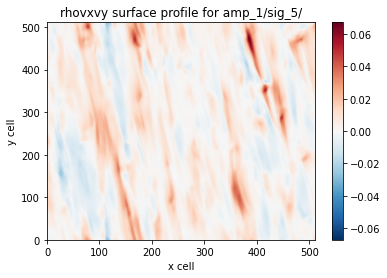

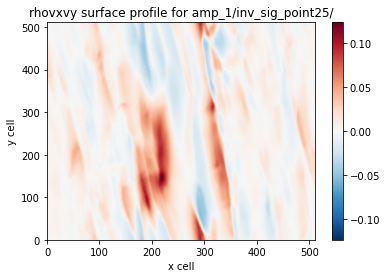

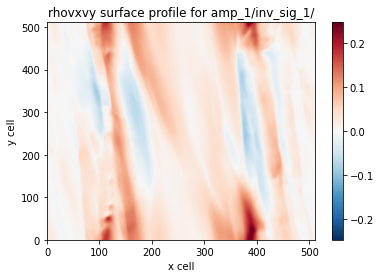

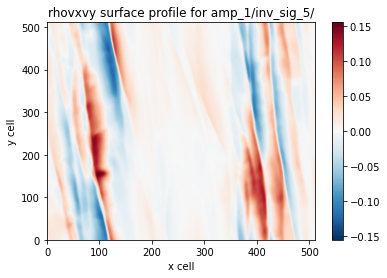

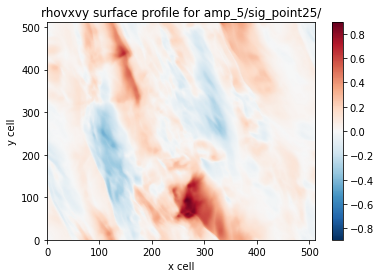

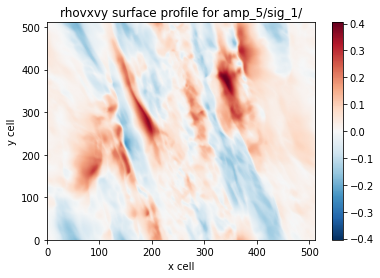

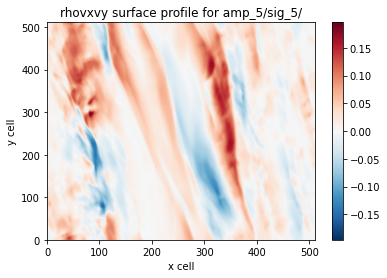

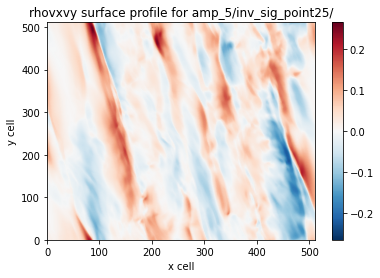

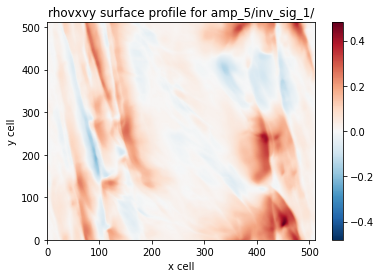

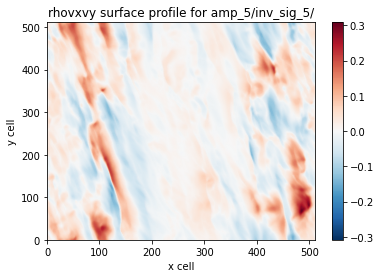

Run time is  39.74413251876831  seconds


In [16]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rhovxvy')
print('Run time is ',(time.time()-start),' seconds' )

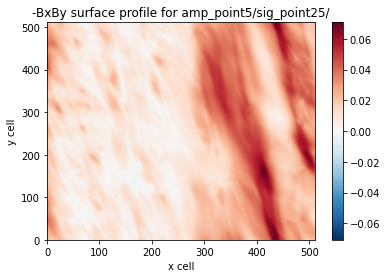

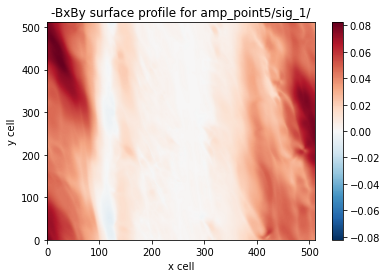

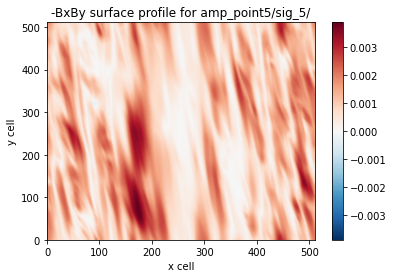

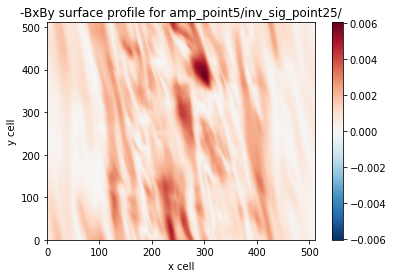

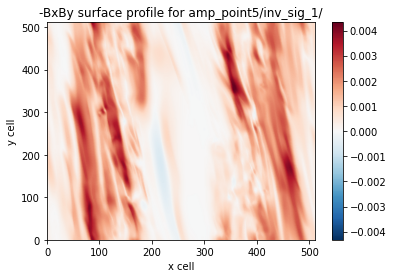

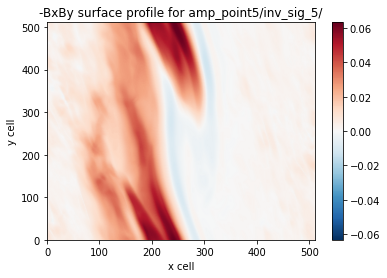

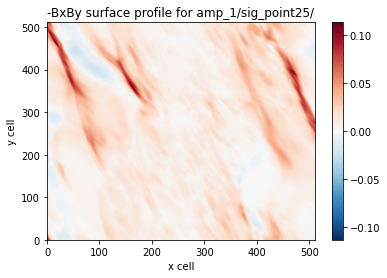

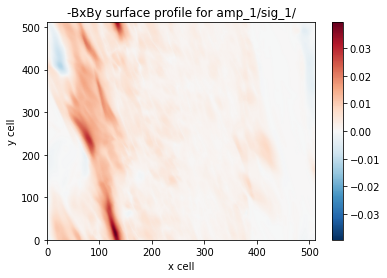

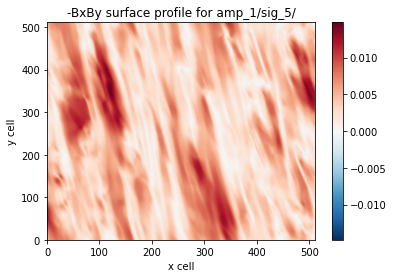

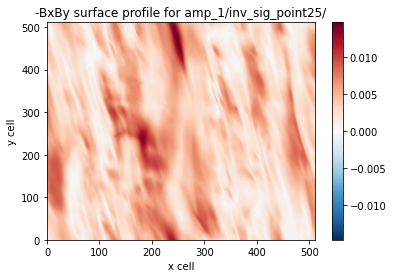

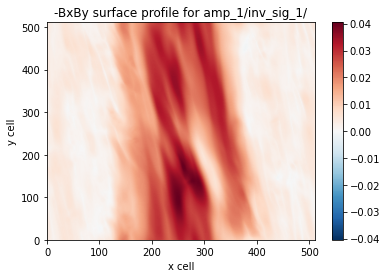

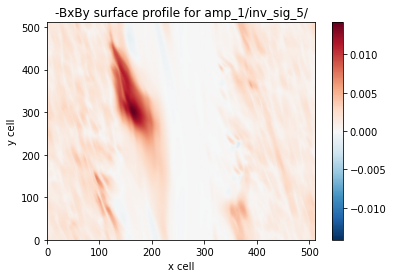

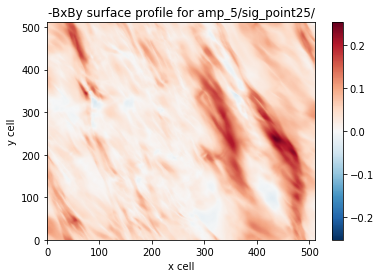

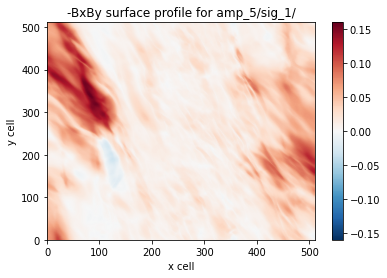

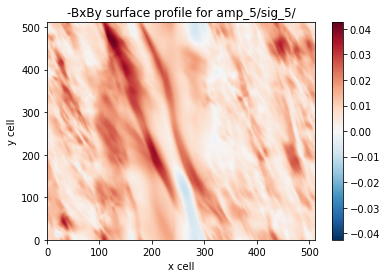

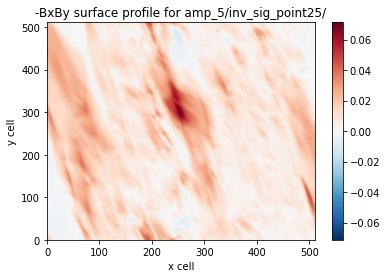

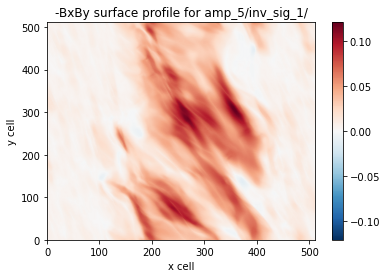

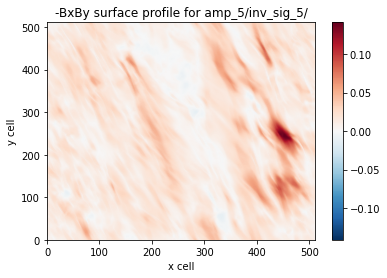

Run time is  79.0002088546753  seconds


In [27]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'-BxBy')
print('Run time is ',(time.time()-start),' seconds' )

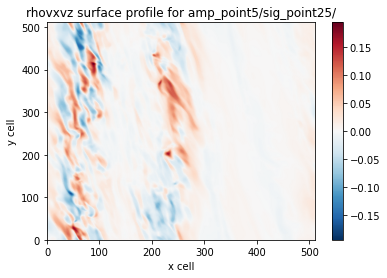

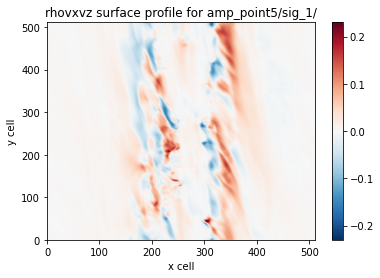

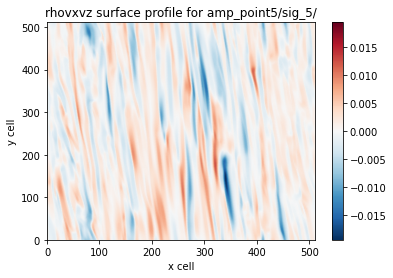

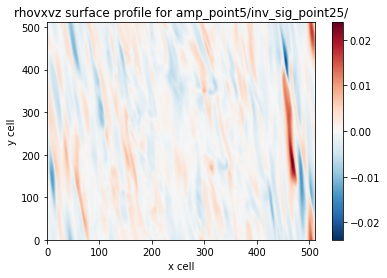

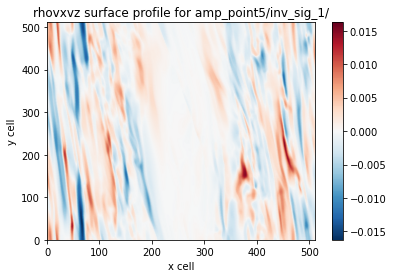

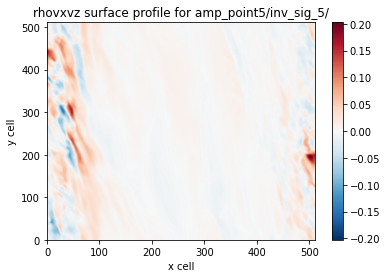

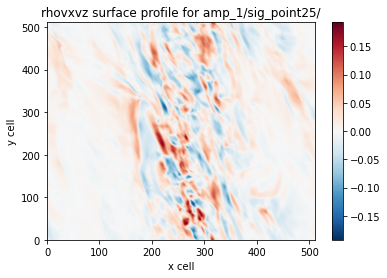

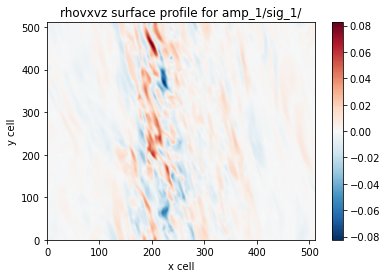

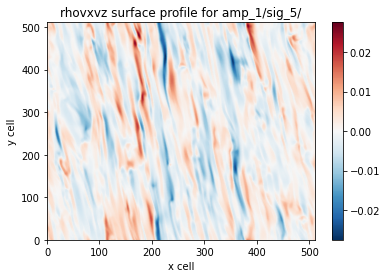

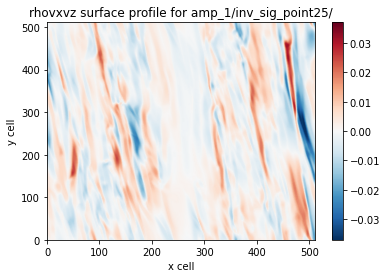

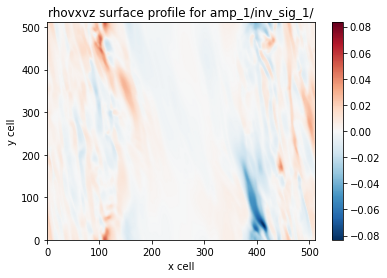

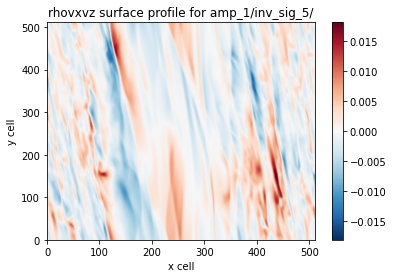

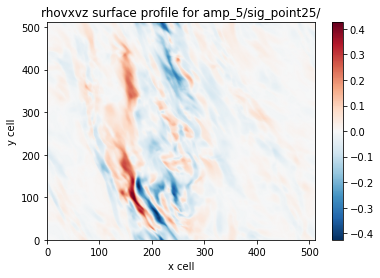

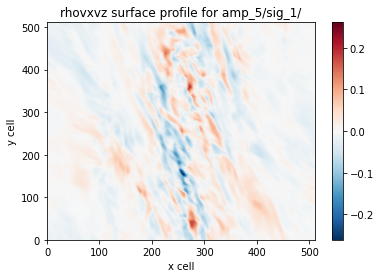

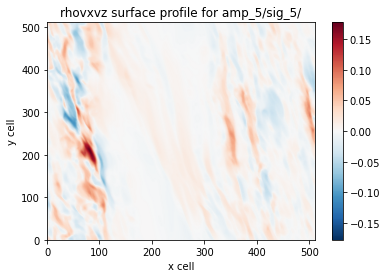

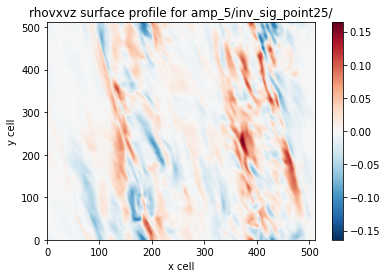

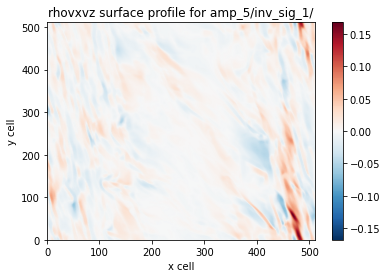

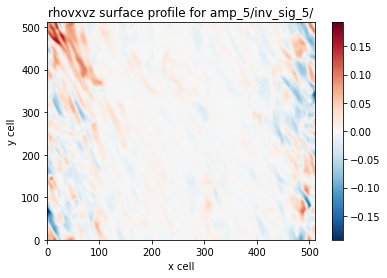

Run time is  37.71088528633118  seconds


In [32]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rhovyvz')
print('Run time is ',(time.time()-start),' seconds' )